In [3]:
# from census import Census
from us import states
from config import API_KEY
import contextily
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cenpy
import segregation
import contextily


/Users/kathrynpanger/Documents/censusMaps/venv/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/kathrynpanger/Documents/censusMaps/venv/lib/python3.8/site-packages/cenpy/tiger.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from

In [17]:
acs = cenpy.products.ACS()



In [18]:
print(acs.variables)

                                                   label  \
AIANHH                                         Geography   
AIHHTL                                         Geography   
AIRES                                          Geography   
ANRC                                           Geography   
B01001A_001E                            Estimate!!Total:   
...                                                  ...   
UA                                             Geography   
ZCTA                                           Geography   
for                         Census API FIPS 'for' clause   
in                           Census API FIPS 'in' clause   
ucgid         Uniform Census Geography Identifier clause   

                                         concept predicateType    group limit  \
AIANHH                                       NaN           NaN      N/A     0   
AIHHTL                                       NaN           NaN      N/A     0   
AIRES                               

In [19]:
print(acs.tables)

                                                  description  \
table_name                                                      
B01001                                             SEX BY AGE   
B01002                                      MEDIAN AGE BY SEX   
B01003                                       TOTAL POPULATION   
B02001                                                   RACE   
B02008      WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...   
...                                                       ...   
C27014             PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE   
C27016      HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...   
C27017      PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...   
C27018      PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...   
C27021      HEALTH INSURANCE COVERAGE STATUS  BY LIVING AR...   

                                                      columns  
table_name                                                     
B01001      [B01001_001E, 

In [31]:
acs.filter_tables('BY INCOME', by='description')


,description,columns
table_name,,
B19325,SEX BY WORK EXPERIENCE IN THE PAST 12 MONTHS B...,"[B19325_001E, B19325_002E, B19325_003E, B19325..."


In [23]:
"variables = ['B25105_001E']

In [24]:
variables = ['B25105_001E']
chicago = acs.from_place('Chicago, IL', variables=variables)



Matched: Chicago, IL to Chicago city within layer Incorporated Places


/var/folders/lw/jy_c2z0x221fsb78kk1_h2800000gn/T/ipykernel_29020/1799203092.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  chicago = acs.from_place('Chicago, IL', variables=variables)


In [67]:
chicago_basemap, chicago_extent = contextily.bounds2img(*chicago.total_bounds, zoom=11, source=contextily.providers.CartoDB.Positron)

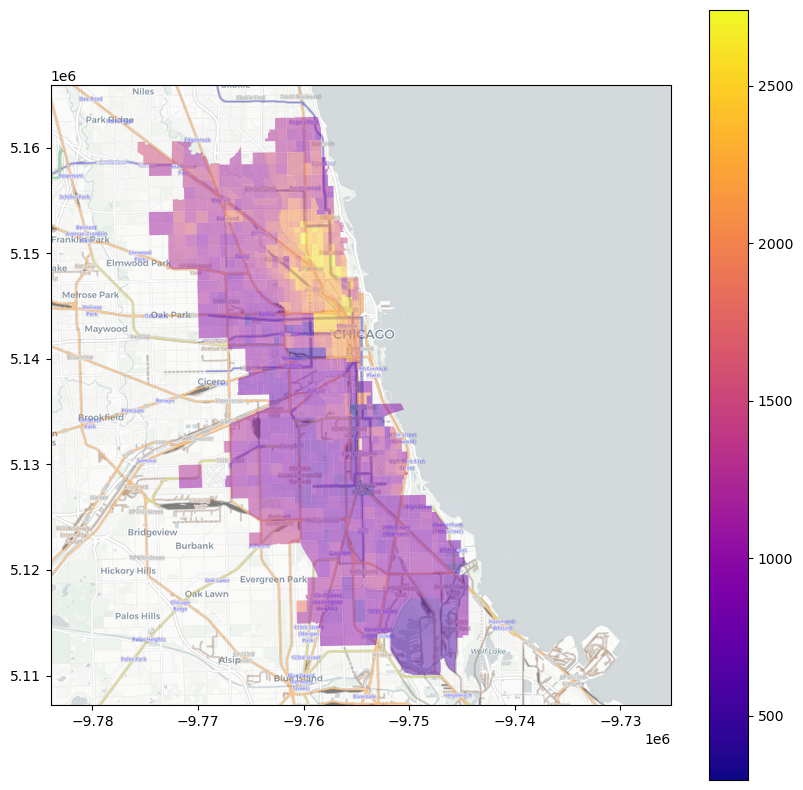

In [68]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(chicago_basemap, extent=chicago_extent, interpolation='sinc')
chicago['housing_cost'] = chicago.eval('B25105_001E')
chicago.plot('housing_cost', cmap='plasma', ax = ax, alpha=.5, legend = True, cax = None, color = None)
contextily.add_basemap(ax, crs=chicago.crs.to_string(), source=contextily.providers.OpenRailwayMap.url, zoom=12, alpha = 0.5)

In [12]:
contextily.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

In [75]:
contextily.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

In [100]:
contextily.providers.OneMapSG.keys()

dict_keys(['Default', 'Night', 'Original', 'Grey', 'LandLot'])

In [104]:
contextily.providers.CartoDB.keys()

dict_keys(['Positron', 'PositronNoLabels', 'PositronOnlyLabels', 'DarkMatter', 'DarkMatterNoLabels', 'DarkMatterOnlyLabels', 'Voyager', 'VoyagerNoLabels', 'VoyagerOnlyLabels', 'VoyagerLabelsUnder'])

In [ ]:
#Good sources
#source=contextily.providers.CartoDB.Positron
#source=contextily.providers.OpenStreetMap.HOT

In [135]:
contextily.providers.OpenRailwayMap.keys()

dict_keys(['url', 'max_zoom', 'html_attribution', 'attribution', 'name'])

In [70]:
import ee
ee.Authenticate()

ModuleNotFoundError: No module named 'ee'